# Krzysztof Nalepa
## Sprawozdanie z ćwiczenia 4

#### Zadanie 1: Interpolacja metodą Newtona 
Napisać własną implementację interpolacji wielomianowej  Newtona (metoda ilorazów róznicowych). Zadbac o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji. Narysować wykres wielomianu interpolacyjnego dla tych samych danych, co w poprzednim punkcie. Oszacować dokładność (błąd interpolacji). 

In [0]:
import numpy
def table_function(min, max, number_of_points, function):
  domain = []
  values = []
  step = (max - min) / number_of_points
  for i in numpy.arange(min, max+step, step):
    domain.append(i)
    values.append(function(i))
  return domain, values

def table_function2(min, max, number_of_points, function):
  domain = []
  values = []
  step = (max - min) / number_of_points
  for i in numpy.arange(min+(step/2), max+(step/2), step):
    domain.append(i)
    values.append(function(i))
  return domain, values

def print_table(domain, values, name):
  print(tabulate({"x": domain, name: values}, headers="keys", floatfmt=".10f"), "\n\n")

In [0]:
import sympy
def calculate_diff_quotients(x, y):
    length = len(y)
    result = y.copy()

    for i in range(1, length):
        for j in range(length - 1, i - 1, -1):
            result[j] = (result[j] - result[j - 1]) / (x[j] - x[j - i])

    return result


def newton_polynomial(x, y):
    if len(x) != len(y):
        return None
    quotients = calculate_diff_quotients(x, y)
    n = len(x)
    X = sympy.symbols('x')
    polynomial = 0

    for i in range(n):
        value = quotients[i]
        for j in range(i):
            value *= (X - x[j])
        polynomial += value

    return sympy.simplify(polynomial)


def calculate_value(polynomial, x):
  X = sympy.symbols('x')
  return polynomial.evalf(subs={X: x})

def calculate_values(polynomial, domain):
  values = []
  for number in domain:
    values.append(calculate_value(polynomial, number))
  return values

In [0]:
def compare_results(domain, values_original, values_interpolated, function_name):
    relative_error = []
    absolute_error = []
    for i in range(len(domain)):
      absolute_error.append(abs(values_original[i] - values_interpolated[i]))
      relative_error.append(absolute_error[i] / values_original[i])
    print(tabulate({"x": domain, function_name: values_original, function_name + " interpolation": values_interpolated, 
                  "realtive error": relative_error, "absolute error": absolute_error}, headers="keys", floatfmt=".10f"), "\n\n")


In [0]:
import matplotlib.pyplot as plt
def show_charts(function, polynomial, function_name):
  domain, values = table_function(0, 10, 1000, function)
  values_in = calculate_values(polynomial, domain)

  plt.plot(domain, values_in, label=function_name + " interpolation")
  plt.plot(domain, values, label=function_name)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title(function_name)
  plt.legend()
  plt.show()


In [0]:
import math
from tabulate import tabulate
polynomial = lambda x: x**3 + 2*x
def newton_interpolation(min, max, number_of_points):
  domain_sqrt, values_sqrt = table_function(min, max, number_of_points, math.sqrt)
  domain_sin, values_sin = table_function(min, max, number_of_points, math.sin)
  domain_polynomial, values_polynomial = table_function(min, max, number_of_points, polynomial)

  print_table(domain_sqrt, values_sqrt, "sqrt(x)")
  print_table(domain_sin, values_sin, "sin(x)")
  print_table(domain_polynomial, values_polynomial, "x^3 + 2*x")

  sqrt_interpolated = newton_polynomial(domain_sqrt, values_sqrt)
  sin_interpolated = newton_polynomial(domain_sin, values_sin)
  polynomial_interpolated = newton_polynomial(domain_polynomial, values_polynomial)

  print (f"sqrt: {sqrt_interpolated} \n")
  print (f"sin: {sin_interpolated} \n")
  print (f"x^3 + 2*x: {polynomial_interpolated} \n")

  sqrt_domain2, sqrt_values2 = table_function2(min, max, number_of_points, math.sqrt)
  sin_domain2, sin_values2 = table_function2(min, max, number_of_points, math.sin)
  polynomial_domain2, polynomial_values2 = table_function2(min, max, number_of_points, polynomial)

  values_sqrt_in = calculate_values(sqrt_interpolated, sqrt_domain2)
  values_sin_in = calculate_values(sin_interpolated, sin_domain2)
  values_polynomial_in = calculate_values(polynomial_interpolated, polynomial_domain2)

  compare_results(sqrt_domain2, sqrt_values2, values_sqrt_in, "sqrt")
  compare_results(sin_domain2, sin_values2, values_sin_in, "sin")
  compare_results(polynomial_domain2, polynomial_values2, values_polynomial_in, "x^3 + 2*x")

  show_charts(math.sqrt, sqrt_interpolated, "sqrt")
  show_charts(math.sin, sin_interpolated, "sin")
  show_charts(polynomial, polynomial_interpolated, "x^3 + 2*x")
  


Interpolacja dla 3 węzłów

            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 3.3333333333  1.8257418584
 6.6666666667  2.5819888975
10.0000000000  3.1622776602 


            x         sin(x)
-------------  -------------
 0.0000000000   0.0000000000
 3.3333333333  -0.1905679629
 6.6666666667   0.3741512306
10.0000000000  -0.5440211109 


            x        x^3 + 2*x
-------------  ---------------
 0.0000000000     0.0000000000
 3.3333333333    43.7037037037
 6.6666666667   309.6296296296
10.0000000000  1020.0000000000 


sqrt: x*(0.00402091444262343*x**2 - 0.0883364112915616*x + 0.797500434670111) 

sin: x*(-0.0100718041105327*x**2 + 0.134705963139825*x - 0.394281331433923) 

x^3 + 2*x: x*(1.0*x**2 + 2.0) 

           x          sqrt    sqrt interpolation    realtive error    absolute error
------------  ------------  --------------------  ----------------  ----------------
1.6666666667  1.2909944487          1.1024038155      0.1460816764      0.1885906332
5.0000000000  2.23

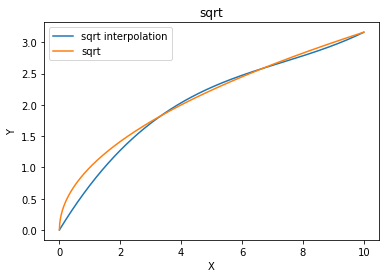

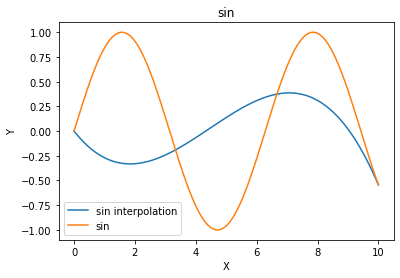

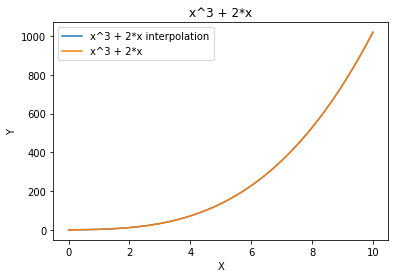

In [6]:
newton_interpolation(0, 10, 3)

Interpolacja dla 4 węzłów

            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 2.5000000000  1.5811388301
 5.0000000000  2.2360679775
 7.5000000000  2.7386127875
10.0000000000  3.1622776602 


            x         sin(x)
-------------  -------------
 0.0000000000   0.0000000000
 2.5000000000   0.5984721441
 5.0000000000  -0.9589242747
 7.5000000000   0.9379999768
10.0000000000  -0.5440211109 


            x        x^3 + 2*x
-------------  ---------------
 0.0000000000     0.0000000000
 2.5000000000    20.6250000000
 5.0000000000   135.0000000000
 7.5000000000   436.8750000000
10.0000000000  1020.0000000000 


sqrt: x*(-0.00074700900829116*x**3 + 0.0194592721406771*x**2 - 0.187359671555827*x + 0.990906275798561) 

sin: x*(-0.0132730189252085*x**3 + 0.258937302364272*x**2 - 1.53380467478385*x + 2.66293332553089) 

x^3 + 2*x: x*(1.0*x**2 + 2.0) 

           x          sqrt    sqrt interpolation    realtive error    absolute error
------------  ------------  --------------------  -

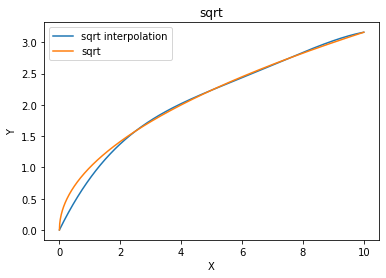

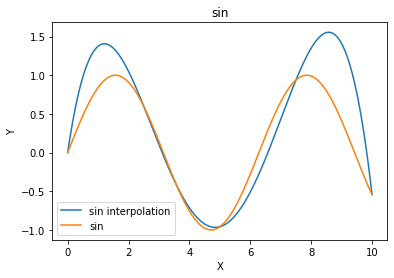

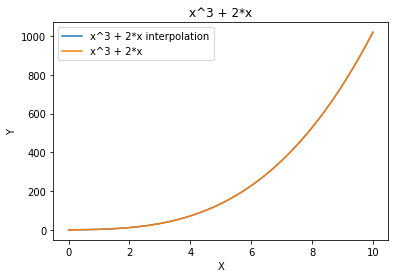

In [7]:
newton_interpolation(0, 10, 4)

Interpolacja dla 5 węzłów

            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 2.0000000000  1.4142135624
 4.0000000000  2.0000000000
 6.0000000000  2.4494897428
 8.0000000000  2.8284271247
10.0000000000  3.1622776602 


            x         sin(x)
-------------  -------------
 0.0000000000   0.0000000000
 2.0000000000   0.9092974268
 4.0000000000  -0.7568024953
 6.0000000000  -0.2794154982
 8.0000000000   0.9893582466
10.0000000000  -0.5440211109 


            x        x^3 + 2*x
-------------  ---------------
 0.0000000000     0.0000000000
 2.0000000000    12.0000000000
 4.0000000000    72.0000000000
 6.0000000000   228.0000000000
 8.0000000000   528.0000000000
10.0000000000  1020.0000000000 


sqrt: x*(0.000152632103160074*x**4 - 0.00468385585455278*x**3 + 0.0553624438949273*x**2 - 0.322895942414569*x + 1.16647762362184) 

sin: x*(0.000997277281565665*x**4 - 0.0357554009431133*x**3 + 0.427647172081666*x**2 - 2.00632974849062*x + 3.02680629310726) 

x^3 + 2*x: x*(1.0*x**2 + 2.

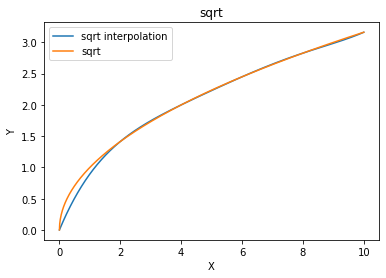

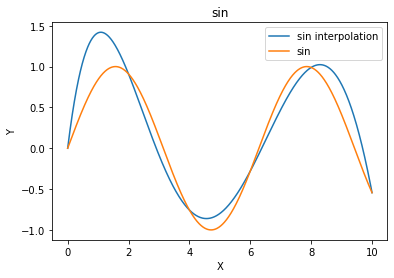

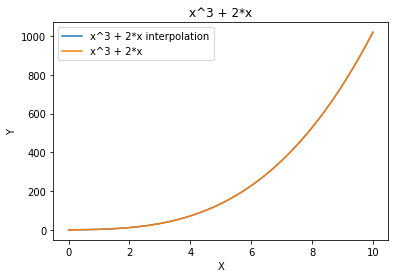

In [8]:
newton_interpolation(0, 10, 5)

Interpolacja dla 8 węzłów

            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 1.2500000000  1.1180339887
 2.5000000000  1.5811388301
 3.7500000000  1.9364916731
 5.0000000000  2.2360679775
 6.2500000000  2.5000000000
 7.5000000000  2.7386127875
 8.7500000000  2.9580398915
10.0000000000  3.1622776602 


            x         sin(x)
-------------  -------------
 0.0000000000   0.0000000000
 1.2500000000   0.9489846194
 2.5000000000   0.5984721441
 3.7500000000  -0.5715613187
 5.0000000000  -0.9589242747
 6.2500000000  -0.0331792165
 7.5000000000   0.9379999768
 8.7500000000   0.6247239538
10.0000000000  -0.5440211109 


            x        x^3 + 2*x
-------------  ---------------
 0.0000000000     0.0000000000
 1.2500000000     4.4531250000
 2.5000000000    20.6250000000
 3.7500000000    60.2343750000
 5.0000000000   135.0000000000
 6.2500000000   256.6406250000
 7.5000000000   436.8750000000
 8.7500000000   687.4218750000
10.0000000000  1020.0000000000 


sqrt: x*(-1.71451895288

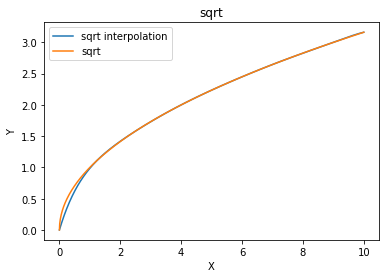

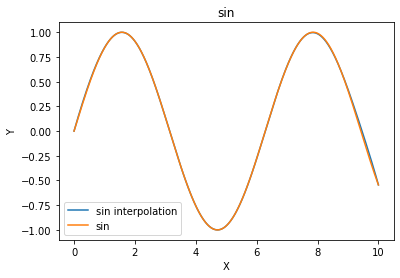

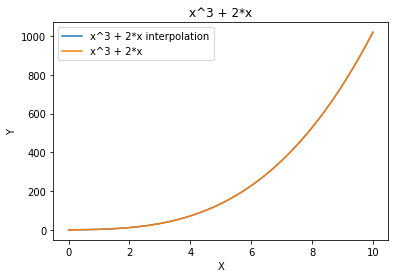

In [9]:
newton_interpolation(0, 10, 8)

#### Zadanie 2: Interpolacja metodą Hermite'a 
Napisać odpowiedni algorytm dla interpolacji Hermite'a. Wizualiacja wyników podobnie jak poprzednio. Oszacować dokładność (błąd interpolacji). 

In [0]:
def hermite_polynomial(x, y):
  if len(x) != len(y):
    return None
  n = len(x)
  multiplicity = [0] * n

  for i in range(1, n):
    if x[i] == x[i - 1]:
      multiplicity[i] = multiplicity[i - 1] + 1
    else:
      multiplicity[i] = 0

  for i in range(1, n):
    for j in range(n - 1, i - 1, -1):
      if multiplicity[j] == 0:
        y[j] = (y[j] - y[j - 1 - multiplicity[j - 1]]) / (x[j] - x[j - i])
      else:
        y[j] /= i
        multiplicity[j] -= 1

  X = sympy.symbols('x')
  polynomial = 0
  for i in range(n):
      value = y[i]
      for j in range(i):
          value *= (X - x[j])
      polynomial += value

  return sympy.simplify(polynomial)

In [0]:
def hermite_interpolation(min, max, number_of_points):
  domain_sqrt, values_sqrt = table_function(min, max, number_of_points, math.sqrt)
  domain_sin, values_sin = table_function(min, max, number_of_points, math.sin)
  domain_polynomial, values_polynomial = table_function(min, max, number_of_points, polynomial)

  print_table(domain_sqrt, values_sqrt, "sqrt(x)")
  print_table(domain_sin, values_sin, "sin(x)")
  print_table(domain_polynomial, values_polynomial, "x^3 + 2*x")

  sqrt_interpolated = hermite_polynomial(domain_sqrt, values_sqrt)
  sin_interpolated = hermite_polynomial(domain_sin, values_sin)
  polynomial_interpolated = hermite_polynomial(domain_polynomial, values_polynomial)

  print (f"sqrt: {sqrt_interpolated} \n")
  print (f"sin: {sin_interpolated} \n")
  print (f"x^3 + 2*x: {polynomial_interpolated} \n")

  sqrt_domain2, sqrt_values2 = table_function2(min, max, number_of_points, math.sqrt)
  sin_domain2, sin_values2 = table_function2(min, max, number_of_points, math.sin)
  polynomial_domain2, polynomial_values2 = table_function2(min, max, number_of_points, polynomial)

  values_sqrt_in = calculate_values(sqrt_interpolated, sqrt_domain2)
  values_sin_in = calculate_values(sin_interpolated, sin_domain2)
  values_polynomial_in = calculate_values(polynomial_interpolated, polynomial_domain2)

  compare_results(sqrt_domain2, sqrt_values2, values_sqrt_in, "sqrt")
  compare_results(sin_domain2, sin_values2, values_sin_in, "sin")
  compare_results(polynomial_domain2, polynomial_values2, values_polynomial_in, "x^3 + 2*x")

  show_charts(math.sqrt, sqrt_interpolated, "sqrt")
  show_charts(math.sin, sin_interpolated, "sin")
  show_charts(polynomial, polynomial_interpolated, "x^3 + 2*x")

            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 3.3333333333  1.8257418584
 6.6666666667  2.5819888975
10.0000000000  3.1622776602 


            x         sin(x)
-------------  -------------
 0.0000000000   0.0000000000
 3.3333333333  -0.1905679629
 6.6666666667   0.3741512306
10.0000000000  -0.5440211109 


            x        x^3 + 2*x
-------------  ---------------
 0.0000000000     0.0000000000
 3.3333333333    43.7037037037
 6.6666666667   309.6296296296
10.0000000000  1020.0000000000 


sqrt: x*(0.00402091444262343*x**2 - 0.0883364112915616*x + 0.797500434670111) 

sin: x*(-0.0100718041105327*x**2 + 0.134705963139825*x - 0.394281331433923) 

x^3 + 2*x: x*(1.0*x**2 + 2.0) 

           x          sqrt    sqrt interpolation    realtive error    absolute error
------------  ------------  --------------------  ----------------  ----------------
1.6666666667  1.2909944487          1.1024038155      0.1460816764      0.1885906332
5.0000000000  2.23

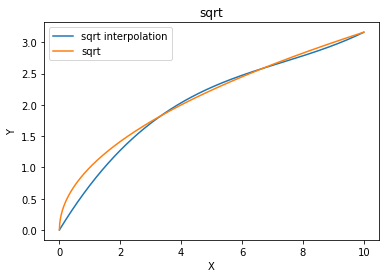

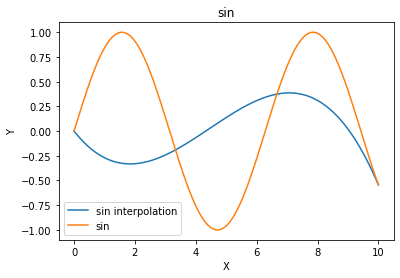

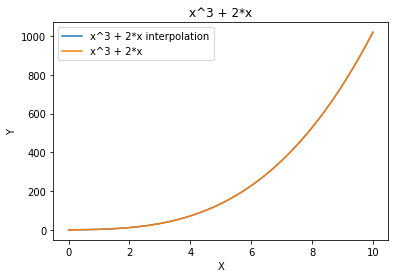

In [12]:
hermite_interpolation(0, 10, 3)

            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 2.5000000000  1.5811388301
 5.0000000000  2.2360679775
 7.5000000000  2.7386127875
10.0000000000  3.1622776602 


            x         sin(x)
-------------  -------------
 0.0000000000   0.0000000000
 2.5000000000   0.5984721441
 5.0000000000  -0.9589242747
 7.5000000000   0.9379999768
10.0000000000  -0.5440211109 


            x        x^3 + 2*x
-------------  ---------------
 0.0000000000     0.0000000000
 2.5000000000    20.6250000000
 5.0000000000   135.0000000000
 7.5000000000   436.8750000000
10.0000000000  1020.0000000000 


sqrt: x*(-0.00074700900829116*x**3 + 0.0194592721406771*x**2 - 0.187359671555827*x + 0.990906275798561) 

sin: x*(-0.0132730189252085*x**3 + 0.258937302364272*x**2 - 1.53380467478385*x + 2.66293332553089) 

x^3 + 2*x: x*(1.0*x**2 + 2.0) 

           x          sqrt    sqrt interpolation    realtive error    absolute error
------------  ------------  --------------------  -

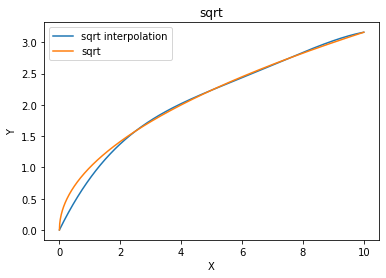

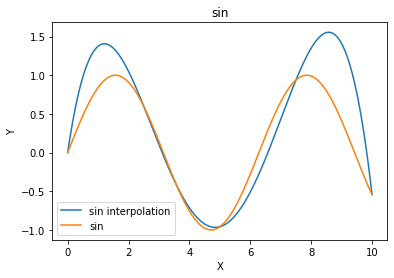

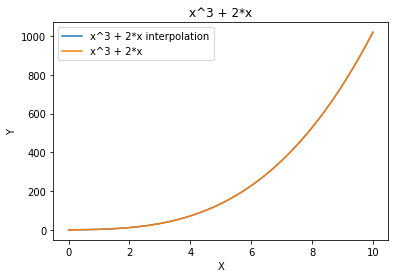

In [13]:
hermite_interpolation(0, 10, 4)

            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 2.0000000000  1.4142135624
 4.0000000000  2.0000000000
 6.0000000000  2.4494897428
 8.0000000000  2.8284271247
10.0000000000  3.1622776602 


            x         sin(x)
-------------  -------------
 0.0000000000   0.0000000000
 2.0000000000   0.9092974268
 4.0000000000  -0.7568024953
 6.0000000000  -0.2794154982
 8.0000000000   0.9893582466
10.0000000000  -0.5440211109 


            x        x^3 + 2*x
-------------  ---------------
 0.0000000000     0.0000000000
 2.0000000000    12.0000000000
 4.0000000000    72.0000000000
 6.0000000000   228.0000000000
 8.0000000000   528.0000000000
10.0000000000  1020.0000000000 


sqrt: x*(0.000152632103160074*x**4 - 0.00468385585455278*x**3 + 0.0553624438949273*x**2 - 0.322895942414569*x + 1.16647762362184) 

sin: x*(0.000997277281565665*x**4 - 0.0357554009431133*x**3 + 0.427647172081666*x**2 - 2.00632974849062*x + 3.02680629310726) 

x^3 + 2*x: x*(1.0*x**2 + 2.

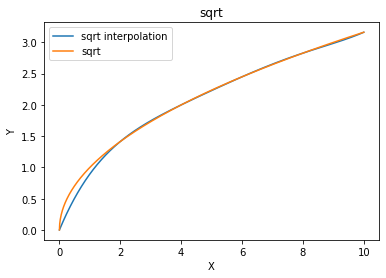

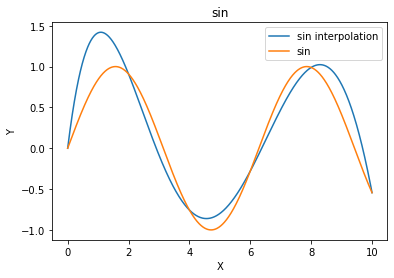

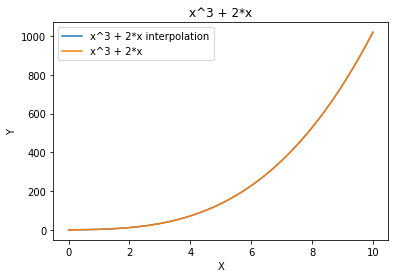

In [14]:
hermite_interpolation(0, 10, 5)

            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 1.2500000000  1.1180339887
 2.5000000000  1.5811388301
 3.7500000000  1.9364916731
 5.0000000000  2.2360679775
 6.2500000000  2.5000000000
 7.5000000000  2.7386127875
 8.7500000000  2.9580398915
10.0000000000  3.1622776602 


            x         sin(x)
-------------  -------------
 0.0000000000   0.0000000000
 1.2500000000   0.9489846194
 2.5000000000   0.5984721441
 3.7500000000  -0.5715613187
 5.0000000000  -0.9589242747
 6.2500000000  -0.0331792165
 7.5000000000   0.9379999768
 8.7500000000   0.6247239538
10.0000000000  -0.5440211109 


            x        x^3 + 2*x
-------------  ---------------
 0.0000000000     0.0000000000
 1.2500000000     4.4531250000
 2.5000000000    20.6250000000
 3.7500000000    60.2343750000
 5.0000000000   135.0000000000
 6.2500000000   256.6406250000
 7.5000000000   436.8750000000
 8.7500000000   687.4218750000
10.0000000000  1020.0000000000 


sqrt: x*(-1.71451895288

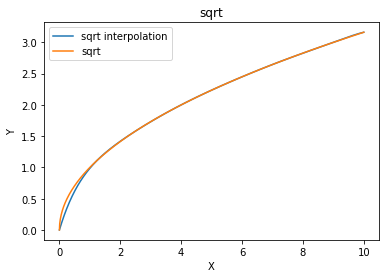

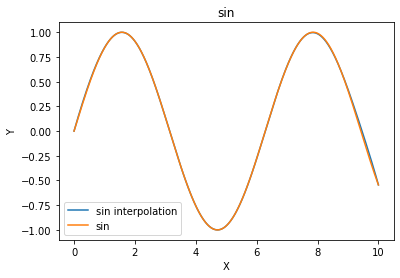

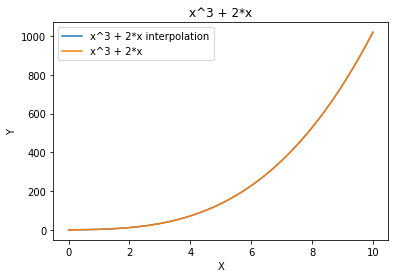

In [15]:
hermite_interpolation(0, 10, 8)

In [0]:
def hermite_interpolation_derivative(min, max, number_of_points, number_of_derivative, y, yp):
  values = []
  domain = []
  step = (max - min) / number_of_points
  for i in numpy.arange(min, max+step, step):
    if number_of_derivative > 0:
      domain = domain + [i] * 2
      values.append(y(i))
      values.append(yp(i))
      number_of_derivative -= 1
    else:
      domain.append(i)
      values.append(y(i))
  

  polynomial_in = hermite_polynomial(domain, values)

  domain2 = []
  values2 = []
  step = (max - min) / number_of_points
  for i in numpy.arange(min+(step/2), max+(step/2), step):
    domain2.append(i)
    values2.append(y(i))

  values_polynomial_in = calculate_values(polynomial_in, domain2)
  compare_results(domain2, values2, values_polynomial_in, "x^3 + 2x")
  show_charts(y, polynomial_in, "x^3 + 2x")

           x       x^3 + 2x    x^3 + 2x interpolation    realtive error    absolute error
------------  -------------  ------------------------  ----------------  ----------------
1.6666666667   0.9954079578              1.1204264429      0.1255952237      0.1250184852
5.0000000000  -0.9589242747             -0.9219795989     -0.0385272088      0.0369446758
8.3333333333   0.8872941081              0.8114798971      0.0854442854      0.0758142110 




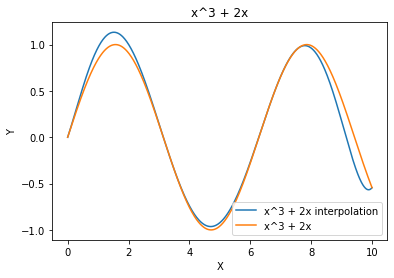

In [17]:
hermite_interpolation_derivative(0, 10, 3, 3 , math.sin, math.cos)

           x        x^3 + 2x    x^3 + 2x interpolation    realtive error    absolute error
------------  --------------  ------------------------  ----------------  ----------------
1.6666666667    7.9629629630              7.9629629630      0.0000000000      0.0000000000
5.0000000000  135.0000000000            135.0000000000      0.0000000000      0.0000000000
8.3333333333  595.3703703704            595.3703703704      0.0000000000      0.0000000000 




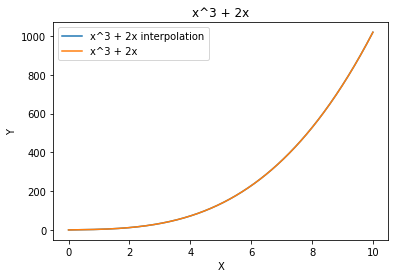

In [18]:
hermite_interpolation_derivative(0, 10, 3, 3 , lambda x: x**3 + 2*x, lambda x: 3*x**2 + 2)

#### Zadanie 3: Wyjaśnić i zademonstrować efekt Rungego 


Efekt Rungego polega na zmniejszeniu dokładności interpolacji wraz ze wzrostem liczby węzłów. Występuje gdy interpolujemy wielomianami dużego stopnia oraz gdy węzły interpolacyjne są równoodległe. Konsekwencją efektu Rungego jest spora rozbieżność na krańcach przedziału.

            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 0.2500000000  0.5000000000
 0.5000000000  0.7071067812
 0.7500000000  0.8660254038
 1.0000000000  1.0000000000
 1.2500000000  1.1180339887
 1.5000000000  1.2247448714
 1.7500000000  1.3228756555
 2.0000000000  1.4142135624
 2.2500000000  1.5000000000
 2.5000000000  1.5811388301
 2.7500000000  1.6583123952
 3.0000000000  1.7320508076
 3.2500000000  1.8027756377
 3.5000000000  1.8708286934
 3.7500000000  1.9364916731
 4.0000000000  2.0000000000
 4.2500000000  2.0615528128
 4.5000000000  2.1213203436
 4.7500000000  2.1794494718
 5.0000000000  2.2360679775
 5.2500000000  2.2912878475
 5.5000000000  2.3452078799
 5.7500000000  2.3979157617
 6.0000000000  2.4494897428
 6.2500000000  2.5000000000
 6.5000000000  2.5495097568
 6.7500000000  2.5980762114
 7.0000000000  2.6457513111
 7.2500000000  2.6925824036
 7.5000000000  2.7386127875
 7.7500000000  2.7838821814
 8.0000000000  2.8284271247
 8.2500000000  2.872

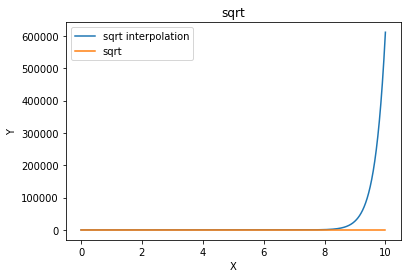

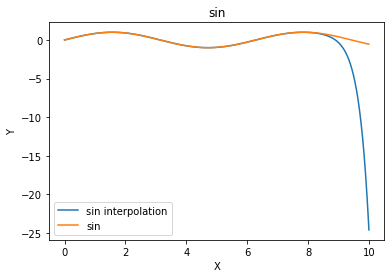

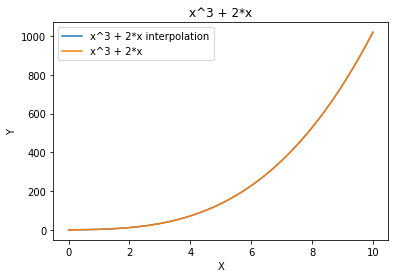

In [19]:
hermite_interpolation(0, 10, 40)

#### Zadanie 4: Interpolacja funkcjami sklejanymi 
Wykorzystując bibliotekę SciPy lub NumPy wykonać interpolację danych przy pomocy B-splinów. Oszacować dokładność (błąd interpolacji)

In [0]:
import scipy.interpolate
def bspline(x, y):
  t, c, k = scipy.interpolate.splrep(x, y)
  return scipy.interpolate.BSpline(t, c, k)

def count_values(f, domain):
  values = []
  for number in domain:
    values.append(f(number))
  return values

def charts(function, polynomial, function_name):
  domain, values = table_function(0, 10, 1000, function)
  values_in = count_values(polynomial, domain)

  plt.plot(domain, values_in, label=function_name + " interpolation")
  plt.plot(domain, values, label=function_name)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title(function_name)
  plt.legend()
  plt.show()

def bspline_interpolation(min, max, number_of_points):
  domain_sqrt, values_sqrt = table_function(min, max, number_of_points, math.sqrt)
  domain_sin, values_sin = table_function(min, max, number_of_points, math.sin)
  domain_polynomial, values_polynomial = table_function(min, max, number_of_points, polynomial)

  print_table(domain_sqrt, values_sqrt, "sqrt(x)")
  print_table(domain_sin, values_sin, "sin(x)")
  print_table(domain_polynomial, values_polynomial, "x^3 + 2*x")

  sqrt_interpolated = bspline(domain_sqrt, values_sqrt)
  sin_interpolated = bspline(domain_sin, values_sin)
  polynomial_interpolated = bspline(domain_polynomial, values_polynomial)

  print (f"sqrt: {sqrt_interpolated} \n")
  print (f"sin: {sin_interpolated} \n")
  print (f"x^3 + 2*x: {polynomial_interpolated} \n")

  sqrt_domain2, sqrt_values2 = table_function2(min, max, number_of_points, math.sqrt)
  sin_domain2, sin_values2 = table_function2(min, max, number_of_points, math.sin)
  polynomial_domain2, polynomial_values2 = table_function2(min, max, number_of_points, polynomial)

  values_sqrt_in = count_values(sqrt_interpolated, sqrt_domain2)
  values_sin_in = count_values(sin_interpolated, sin_domain2)
  values_polynomial_in = count_values(polynomial_interpolated, polynomial_domain2)

  compare_results(sqrt_domain2, sqrt_values2, values_sqrt_in, "sqrt")
  compare_results(sin_domain2, sin_values2, values_sin_in, "sin")
  compare_results(polynomial_domain2, polynomial_values2, values_polynomial_in, "x^3 + 2*x")

  charts(math.sqrt, sqrt_interpolated, "sqrt")
  charts(math.sin, sin_interpolated, "sin")
  charts(polynomial, polynomial_interpolated, "x^3 + 2*x")


            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 3.3333333333  1.8257418584
 6.6666666667  2.5819888975
10.0000000000  3.1622776602 


            x         sin(x)
-------------  -------------
 0.0000000000   0.0000000000
 3.3333333333  -0.1905679629
 6.6666666667   0.3741512306
10.0000000000  -0.5440211109 


            x        x^3 + 2*x
-------------  ---------------
 0.0000000000     0.0000000000
 3.3333333333    43.7037037037
 6.6666666667   309.6296296296
10.0000000000  1020.0000000000 


sqrt: <scipy.interpolate._bsplines.BSpline object at 0x7fbd6dc7fc50> 

sin: <scipy.interpolate._bsplines.BSpline object at 0x7fbd6dc7f908> 

x^3 + 2*x: <scipy.interpolate._bsplines.BSpline object at 0x7fbd6dc0ab00> 

           x          sqrt    sqrt interpolation    realtive error    absolute error
------------  ------------  --------------------  ----------------  ----------------
1.6666666667  1.2909944487          1.1024038155      0.1460816764      0.18

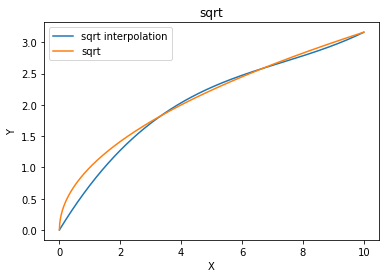

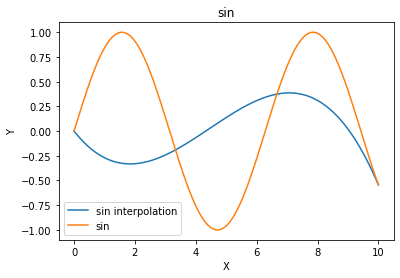

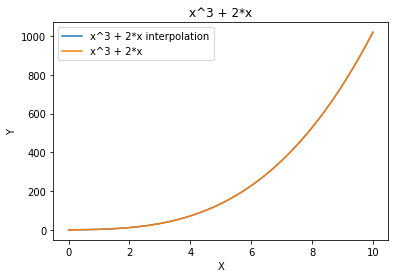

In [43]:
bspline_interpolation(0, 10, 3)

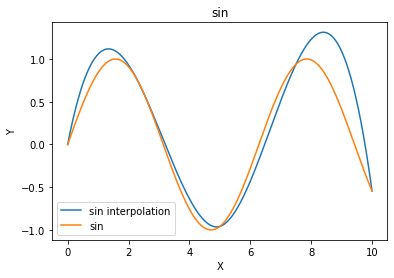

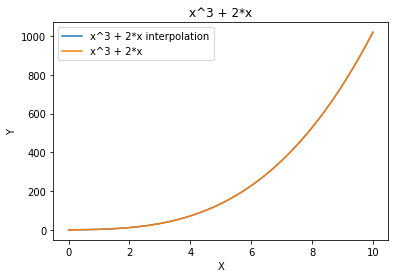

In [44]:
bspline_interpolation(0, 10, 4)

            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 2.0000000000  1.4142135624
 4.0000000000  2.0000000000
 6.0000000000  2.4494897428
 8.0000000000  2.8284271247
10.0000000000  3.1622776602 


            x         sin(x)
-------------  -------------
 0.0000000000   0.0000000000
 2.0000000000   0.9092974268
 4.0000000000  -0.7568024953
 6.0000000000  -0.2794154982
 8.0000000000   0.9893582466
10.0000000000  -0.5440211109 


            x        x^3 + 2*x
-------------  ---------------
 0.0000000000     0.0000000000
 2.0000000000    12.0000000000
 4.0000000000    72.0000000000
 6.0000000000   228.0000000000
 8.0000000000   528.0000000000
10.0000000000  1020.0000000000 


sqrt: <scipy.interpolate._bsplines.BSpline object at 0x7fbd67be6630> 

sin: <scipy.interpolate._bsplines.BSpline object at 0x7fbd67bf12b0> 

x^3 + 2*x: <scipy.interpolate._bsplines.BSpline object at 0x7fbd67bf1278> 

           x          sqrt    sqrt interpolation    realtive error    

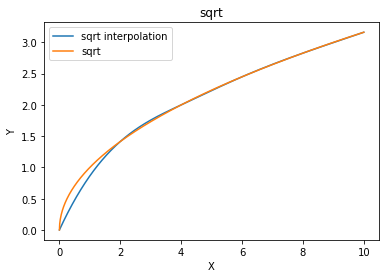

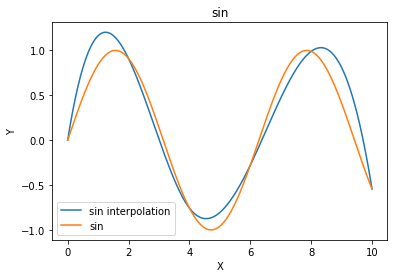

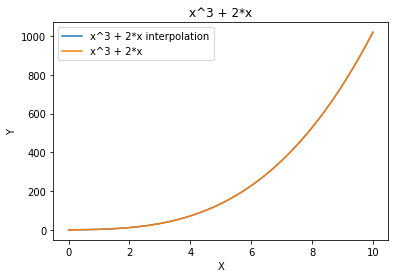

In [45]:
bspline_interpolation(0, 10, 5)

            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 1.2500000000  1.1180339887
 2.5000000000  1.5811388301
 3.7500000000  1.9364916731
 5.0000000000  2.2360679775
 6.2500000000  2.5000000000
 7.5000000000  2.7386127875
 8.7500000000  2.9580398915
10.0000000000  3.1622776602 


            x         sin(x)
-------------  -------------
 0.0000000000   0.0000000000
 1.2500000000   0.9489846194
 2.5000000000   0.5984721441
 3.7500000000  -0.5715613187
 5.0000000000  -0.9589242747
 6.2500000000  -0.0331792165
 7.5000000000   0.9379999768
 8.7500000000   0.6247239538
10.0000000000  -0.5440211109 


            x        x^3 + 2*x
-------------  ---------------
 0.0000000000     0.0000000000
 1.2500000000     4.4531250000
 2.5000000000    20.6250000000
 3.7500000000    60.2343750000
 5.0000000000   135.0000000000
 6.2500000000   256.6406250000
 7.5000000000   436.8750000000
 8.7500000000   687.4218750000
10.0000000000  1020.0000000000 


sqrt: <scipy.interpolat

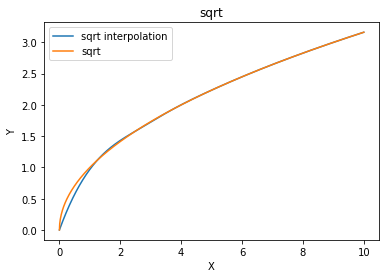

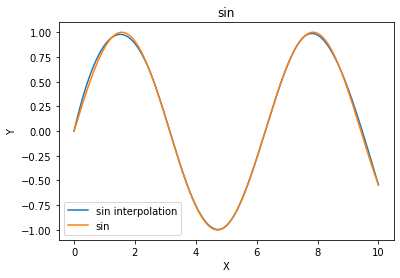

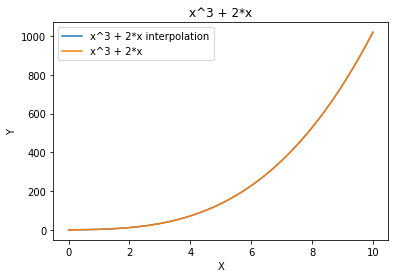

In [46]:
bspline_interpolation(0, 10, 8)